## Desk calculator project:

The task is to build a quantum circuit that performs the difference between the binary reprentations
of two positive integers. The circuit can be defined as a variation of the quantum adder explained
in class and using the Quantum Fourier Transform.
The circuit must be implemented in Qiskit and demonstrated on a one or two instances.
The project can be extended with the implementation of a complete desk calculator

## Adder:

In [2]:
# we want to add two positive integer number on a quantum computer
# With the classical computation (on our CPU we have):
a = 1
b = 2

a+b

3

### Toffoli approach

In [7]:
from qiskit import *

In [8]:
# The reason we need numbers with less than 8 digits is because 
#the IBM QISkit simulator only has 32 (qu)bits for us to uses

first = input("Enter a binary number with less than 8 digits")
second = input("Enter another binary number with less than 8 digits")

print(first, second)

Enter a binary number with less than 8 digits101
Enter another binary number with less than 8 digits001
101 001


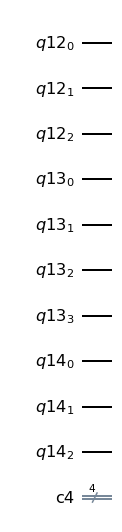

In [26]:
# here we check which number is the longest and we take that length 'l' to declare 
# two quantumRegisters that contain 'l' qubits.
l = len(first)
l2 = len(second)
if l > l2:
     n = l
else:
     n = l2
        
        
#Initializing the registers; two quantum registers with n bits each
#1 more with n+1 bits, which will also hold the sum of the two #numbers
#The classical register has n+1 bits, which is used to make the sum #readable

a = QuantumRegister(n) #First number
b = QuantumRegister(n+1) #Second number, then sum
c = QuantumRegister(n) #Carry bits
cl = ClassicalRegister(n+1) #Classical output
#Combining all of them into one quantum circuit
qc = QuantumCircuit(a, b, c, cl)
qc.draw('mpl')

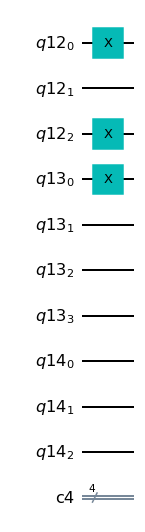

In [27]:
# Setting up the registers using the values inputted
# since the qubits initially always start from 0, we use not gate to set 1 our qubits where in the binary number
# inserted there is a 1
for i in range(l):
    if first[i] == "1":
        qc.x(a[l - (i+1)]) #Flip the qubit from 0 to 1
for i in range(l2):
    if second[i] == "1":
        qc.x(b[l2 - (i+1)]) #Flip the qubit from 0 to 1
qc.draw('mpl')

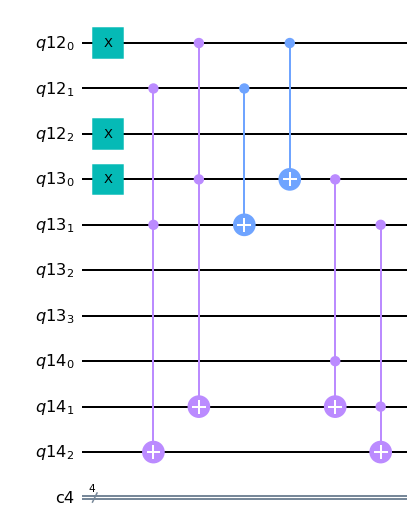

In [28]:
#Implementing a carry gate that is applied on all (c[i], a[i], b[i]) #with output fed to c[i+1]
for i in range(n-1):
    qc.ccx(a[i], b[i], c[i+1])
    qc.cx(a[i], b[i])
    qc.ccx(c[i], b[i], c[i+1])

qc.draw('mpl')

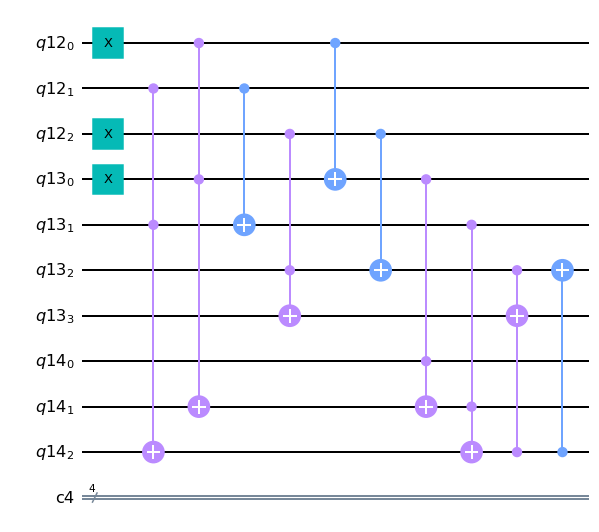

In [29]:

#For the last iteration of the carry gate, instead of feeding the
#result to c[n], we use b[n], which is why c has only n bits,
#with c[n-1] being the last carry bit
qc.ccx(a[n-1], b[n-1], b[n])
qc.draw('mpl')
qc.cx(a[n-1], b[n-1])
qc.draw('mpl')
qc.ccx(c[n-1], b[n-1], b[n])
qc.draw('mpl')
#Reversing the gate operation performed on b[n-1]
qc.cx(c[n-1], b[n-1])
qc.draw('mpl')


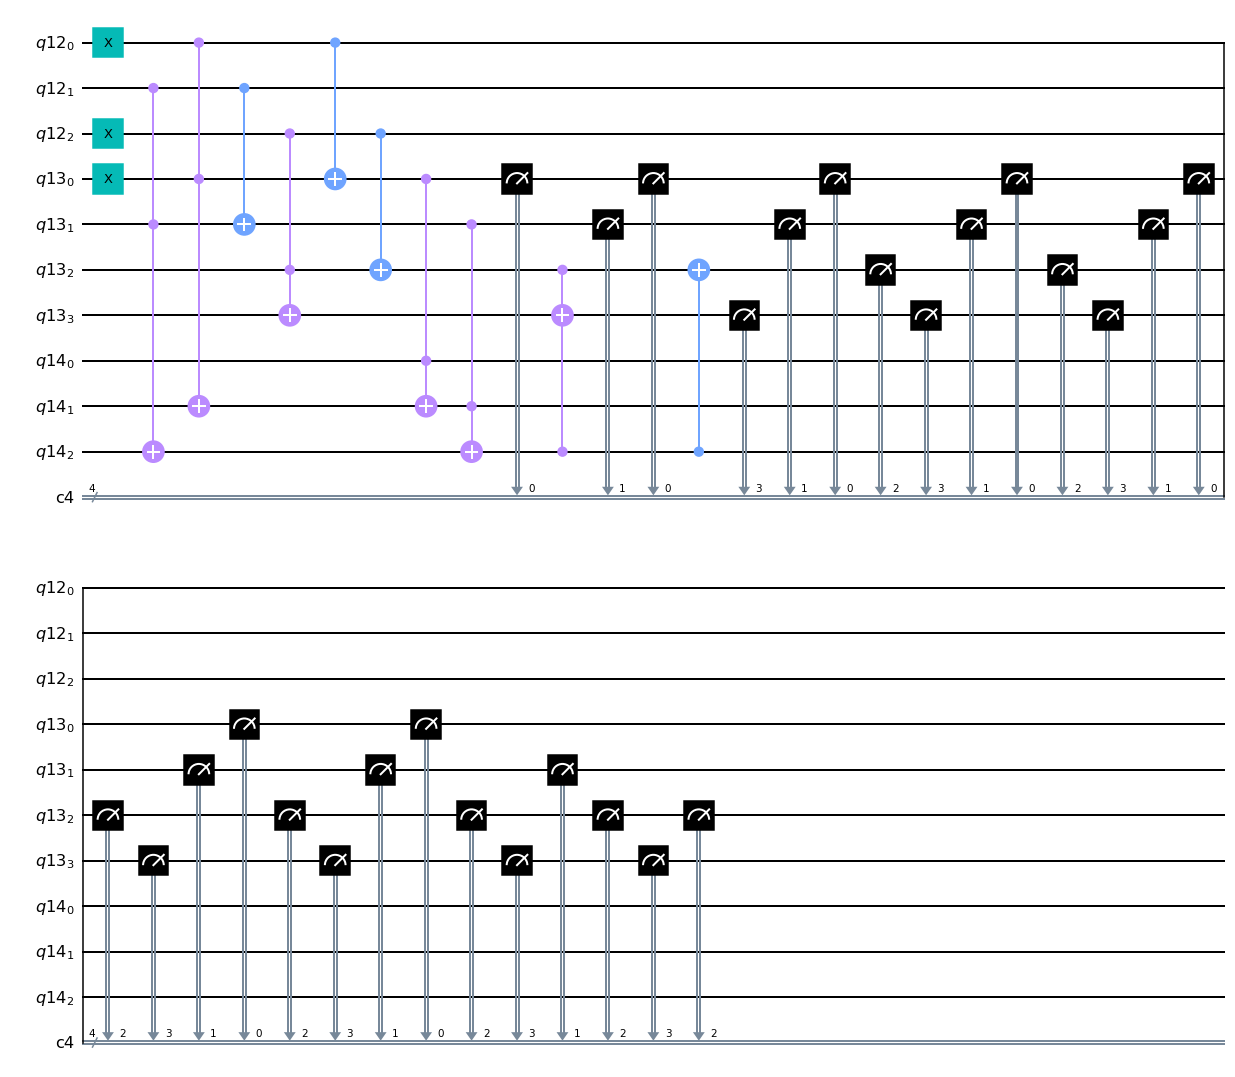

In [36]:
#Measure qubits
for i in range(n+1):
    qc.measure(b[i], cl[i])
    
qc.draw('mpl')

In [37]:
#Set chosen backend and execute job
num_shots = 100 #Setting the number of times to repeat measurement
job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=num_shots)
#Get results of program
job_stats = job.result().get_counts()
print(job_stats) 

{'0100': 100}
